## Initial Parameters

In [1]:
INPUT_DIR = '../../data/generated_data/model_progan_2022.05.13.13.43.18'
p = 0.5928
L = 128

In [2]:
import os
import glob
import numpy as np
import geometric_measure
import matplotlib.pyplot as plt

if not os.path.exists(INPUT_DIR):
    print('There is no such path:', INPUT_DIR)
filelist = glob.glob(INPUT_DIR + '/' + f'fake_L={L}_p={p}_*.npy')

import importlib
importlib.reload(geometric_measure)   

<module 'geometric_measure' from '/Users/ebi/Desktop/Sims/Git/Improving-critical-exponents_pytorch/src/statphy/geometric_measure.py'>

## Read/Create Input Data

In [3]:
n_samples = 10000
#imgs = [np.load(path) for path in filelist[:n_samples]]
np.random.seed(72)
imgs = [ (np.random.random(size=(L,L)) < p).astype(int) for i in range(n_samples) ]

## Clustering the Input Images

In [140]:
def plot_imgs_labels(imgs, labels, outfilename):
    nrows = len(imgs)
    plt.figure(figsize=(2*5, nrows*5))
    plt.subplots_adjust(wspace=0, hspace=0.01)
    

    for i, img in enumerate(imgs):
        plt.subplot(nrows, 2, 2*i + 1)
        plt.imshow(img, cmap='Greys',)
        plt.axis('off')
        plt.subplot(nrows, 2, 2*i + 2)
        label = labels[i]
        plt.imshow(label,)
        plt.axis('off')
    plt.savefig(outfilename, pad_inches=0.05, bbox_inches='tight') #

# now plot some samples
labels, nums = geometric_measure.clustering(imgs, lower_size=5)
plot_imgs_labels(imgs, labels, outfilename='real.pdf')

## Part doing Statistics

In [6]:
n_samples = 1000
np.random.seed(72)
imgs = [ (np.random.random(size=(L,L)) < p).astype(int) for i in range(n_samples) ]

# get the mesures related to the configurations
measure_real = geometric_measure.get_measure(imgs)
# get the statistics of measures
stat_real = geometric_measure.measure_statistics(measure_real, nbins_for_ns=43)

100%|██████████| 1000/1000 [01:22<00:00, 12.05it/s]


1.0


Text(0, 0.5, '$n(s)$')

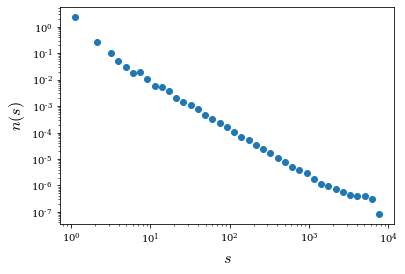

In [22]:
ns = stat_real['ns']
x, y, dx = ns['bin_centers'], ns['hist'], ns['bin_sizes']
plt.loglog(x, y, ls='', marker='o')
print(np.sum(y*dx))

# plot slope
#xn
plt.xlabel('$s$', fontsize=16)
plt.ylabel('$n(s)$', fontsize=16)